In [3]:
%matplotlib inline

import imageio
import scipy.stats
import scipy.special

import numpy as np
import pandas as pd
from numpy import array as arr

import os
import re
import math

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
from astropy.io import fits

from scipy.stats import sem 
from scipy import ndimage as ndi
from scipy.optimize import curve_fit

import sys
sys.path.append('../../Analysis_code/klab_python_lib/')

import klib

### Can comment below if not editing klib
%load_ext autoreload
%aimport klib
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
old_amps = np.ones(numtones)*amp_guess
iteration = 0

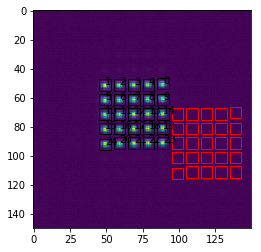

Peaks found:25
1947.2


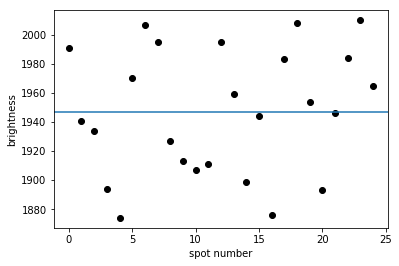

In [82]:
filename = 'A:\\190521\\ss.bmp'
img=mpimg.imread(filename)
#img = np.transpose(img[1200:1400, 1250:1450]) # transposing so that the rois get numbered in a sane way hopefully
img = np.transpose(img[1250:1400, 1400:1550]) # transposing so that the rois get numbered in a sane way hopefully
#img = np.transpose(img)
plt.imshow(img)
roiSettings = [4, 5, 60]
bgoff = (50,20)
rois, bgrois = klib.analysis.find_rois(img, *roiSettings, bgoff)

roisums = np.array(list(map(lambda roi: klib.analysis.get_roi_sum(img, roi, bgoff, display=False, bgsub = True),rois)))

corners = arr(rois)[:,[0,2]]
corners = (corners/roiSettings[0]).astype(int)
sort = np.lexsort((corners[:,0],corners[:,1]))

plt.plot(roisums[sort], 'ko')
# plt.axis([-.1, 11.1, 0, 1.1*max(roisums)])
plt.xlabel('spot number')
plt.ylabel('brightness')
plt.axhline(y=np.mean(roisums))
print(np.mean(roisums))

In [72]:
corners = arr(rois)[:,[0,2]]
corners = (corners/roiSettings[0]).astype(int)
sort = np.lexsort((corners[:,0],corners[:,1]))

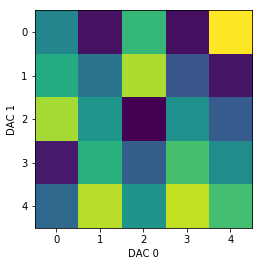

In [73]:
plt.imshow(roisums[sort].reshape((5,5)).transpose()-roisums.mean())
plt.xlabel("DAC 0")
plt.ylabel("DAC 1")

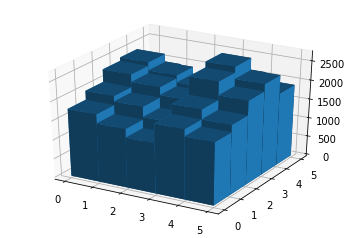

In [41]:
x = np.array([[i]*5 for i in range(5)]).ravel() # x coordinates of each bar
y = np.array([i for i in range(5)]*5) # y coordinates of each bar
z = np.zeros(5*5) # z coordinates of each bar
dx = np.ones(5*5) # length along x-axis of each bar
dy = np.ones(5*5) # length along y-axis of each bar
dz = roisums[sort]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x, y, z, dx, dy, dz)
# ax.scatter(x,y,roisums[sort], c = 'b', marker='o')
plt.show()

In [6]:
numtones = 10
freqcenter = 80
spacing = 6
amp_guess = 450

if len(roisums) > numtones:
    roisums = roisums[::2]

tone_inds = np.arange(numtones)
freqs = np.arange(freqcenter-spacing*numtones/2, freqcenter+spacing*numtones/2, spacing)
phases = np.pi*((tone_inds+1)**2)/(numtones)

ampscale = .05

if iteration:
    new_amps = old_amps - (roisums-np.mean(roisums))*ampscale
else:
    new_amps = old_amps

print('onoff 0b' + '1'*numtones)
print('')

for ind in tone_inds:
    print('gain ' + str(ind) + ' ' + str(new_amps[ind]))
    print('startfreq ' + str(ind) + ' ' + str(freqs[ind]))
    print('loadphase ' + str(ind) + ' ' + str(phases[ind]))
    print('')
print('load')

NameError: name 'roisums' is not defined

In [302]:
old_amps = new_amps
iteration += 1

In [286]:
len(roisums)
roisums

array([1239, 1231, 1173, 1156, 1169, 1230, 1194, 1144, 1217], dtype=uint32)

array([  5.11878699e-07,   5.89107073e-07])

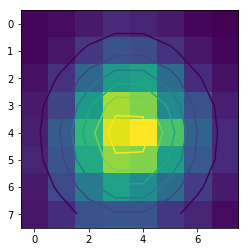

In [287]:
roi = rois[0]
iimg = img[roi[2]:roi[3],roi[0]:roi[1]]

fitdat, params, perr = klib.mathutil.gaussianBeamFit2D(iimg)
plt.imshow(iimg)
plt.contour(fitdat)

params[-3:-1]*(2.2*10**-6)*(22*10**-3)/(300*10**-3)